In [1]:
!pip install -U mxnet-cu101==1.7.0
!pip install d2l==0.17.2

     |███████████████████████████████▌| 834.1 MB 1.2 MB/s eta 0:00:10tcmalloc: large alloc 1147494400 bytes == 0x5582503ec000 @  0x7f1c9c67f615 0x558216adc4cc 0x558216bbc47a 0x558216adf2ed 0x558216bd0e1d 0x558216b52e99 0x558216b4d9ee 0x558216ae0bda 0x558216b52d00 0x558216b4d9ee 0x558216ae0bda 0x558216b4f737 0x558216bd1c66 0x558216b4edaf 0x558216bd1c66 0x558216b4edaf 0x558216bd1c66 0x558216b4edaf 0x558216ae1039 0x558216b24409 0x558216adfc52 0x558216b52c25 0x558216b4d9ee 0x558216ae0bda 0x558216b4f737 0x558216b4d9ee 0x558216ae0bda 0x558216b4e915 0x558216ae0afa 0x558216b4ec0d 0x558216b4d9ee
     |████████████████████████████████| 846.0 MB 21 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
     |████████████████████████████████| 82 kB 818 kB/s 
     |████████████████████████████████| 9.9 MB 51.7 MB/s 
     |████████████████████████████████| 11.6 MB 72.0 MB/s 
     |██████

# Vectorization for Speed

In [1]:
%matplotlib inline
import math
import time
from mxnet import np
from d2l import mxnet as d2l

In [2]:
n = 10000
a = np.ones(n)
b = np.ones(n)

Define a timer

In [5]:
class Timer:  
    """Record multiple running times."""
    def __init__(self):
        self.times = []
        self.start()

    def start(self):
        """Start the timer."""
        self.tik = time.time()

    def stop(self):
        """Stop the timer and record the time in a list."""
        self.times.append(time.time() - self.tik)
        return self.times[-1]

    def avg(self):
        """Return the average time."""
        return sum(self.times) / len(self.times)

    def sum(self):
        """Return the sum of time."""
        return sum(self.times)

    def cumsum(self):
        """Return the accumulated time."""
        return np.array(self.times).cumsum().tolist()

In [ ]:
Benchmark the workloads

In [6]:
c = np.zeros(n)
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]
f'{timer.stop():.5f} sec'

'3.99367 sec'

In [7]:
timer.start()
d = a + b
f'{timer.stop():.5f} sec'

'0.00081 sec'

# The Normal Distribution and Squared Loss

In [8]:
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 / sigma**2 * (x - mu)**2)

Visualize the normal distributions

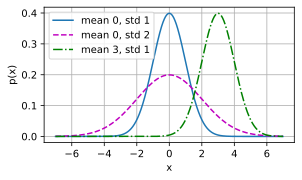

In [9]:
# Use numpy again for visualization
x = np.arange(-7, 7, 0.01)

# Mean and standard deviation pairs
params = [(0, 1), (0, 2), (3, 1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
         ylabel='p(x)', figsize=(4.5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])